In [8]:
import pandas as pd
import datetime
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
def set_col_types(df):
    if "target" in df.columns:
        categorical_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
    else:
        categorical_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
    df['customer_ID'] = df['customer_ID'].astype("string")
    
    for col in categorical_cols:
        df[col] = df[col].astype("string")
    df["S_2"] = pd.to_datetime(df['S_2'], format=r'%Y-%m-%d').astype('datetime64[ns]')
    df["B_31"] = df["B_31"].astype(np.int8)
    return df

In [10]:
df = pd.read_parquet(r'../amex-default-prediction/train_data.parquet')
#reduce df for development !!!!! comment out line below for final model
#df = df[:10000]

df = set_col_types(df)

In [11]:
df.drop(columns=['customer_ID'], inplace=True)


In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5531451 entries, 0 to 5531450
Data columns (total 190 columns):
 #    Column  Dtype         
---   ------  -----         
 0    S_2     datetime64[ns]
 1    P_2     float32       
 2    D_39    float32       
 3    B_1     float32       
 4    B_2     float32       
 5    R_1     float32       
 6    S_3     float32       
 7    D_41    float32       
 8    B_3     float32       
 9    D_42    float32       
 10   D_43    float32       
 11   D_44    float32       
 12   B_4     float32       
 13   D_45    float32       
 14   B_5     float32       
 15   R_2     float32       
 16   D_46    float32       
 17   D_47    float32       
 18   D_48    float32       
 19   D_49    float32       
 20   B_6     float32       
 21   B_7     float32       
 22   B_8     float32       
 23   D_50    float32       
 24   D_51    float32       
 25   B_9     float32       
 26   R_3     float32       
 27   D_52    float32       
 28   P_3     fl

In [13]:
#old code that made the plots independently
# # create a figure for each column
# for col in df.columns:
#     plt.figure()
#     print(col)
#     # check if the column is of type Categorical
#     if df[col].dtype == "string":
#         plt.title(col + " (Category)")
#         data1 = df[df["target"] == 1][col].fillna("NULL")
#         data2 = df[df["target"] == 0][col].fillna("NULL")
#     else:
#         if df[col].dtype == "datetime64[ns]":
#             plt.title(col + " (Date)")
#             data1 = df[df["target"] == 1][col].fillna(-2)
#             data2 = df[df["target"] == 0][col].fillna(-2)
#         else:
#             plt.title(col + " (Numeric)")
#             data1 = df[df["target"] == 1][col].fillna(-2)
#             data2 = df[df["target"] == 0][col].fillna(-2)

#     # plot the data
#     data1.hist(bins=20, alpha=0.5, color="blue")
#     data2.hist(bins=20, alpha=0.5, color="red")

#     # show the plots
#     plt.show()


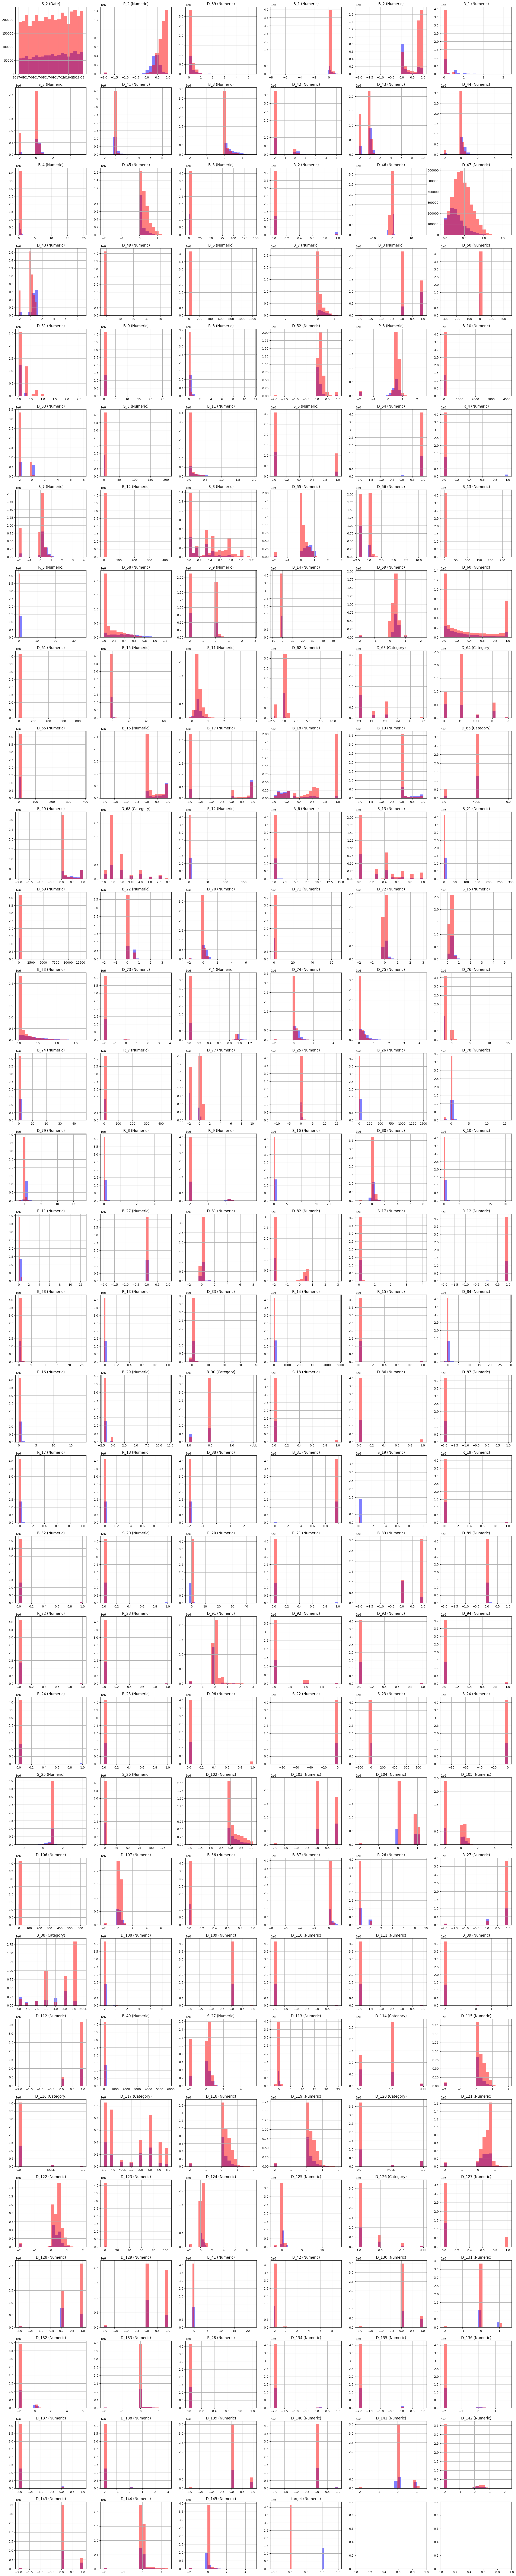

In [14]:
ncols = 6
num_bins = 20
target_col_name = "target"
horizontal_spacing = 0.2

# create a figure with a grid of subplots
fig, axs = plt.subplots(nrows=(len(df.columns)//ncols)+1, ncols=ncols)
fig.set_figheight(5*(len(df.columns)//ncols)+1)
fig.set_figwidth(5 * ncols)
fig.subplots_adjust(hspace=horizontal_spacing)


# loop through each column in your dataframe
for i, col in enumerate(df.columns):
    
    fig_row_num = i // ncols
    fig_col_num = i % ncols

    # check if the column is of type Categorical
    if df[col].dtype == "string":
        axs[fig_row_num][fig_col_num].set_title(col + " (Category)")
        data1 = df[df[target_col_name] == 1][col].fillna("NULL")
        data2 = df[df[target_col_name] == 0][col].fillna("NULL")
    else:
        if df[col].dtype == "datetime64[ns]":
            axs[fig_row_num][fig_col_num].set_title(col + " (Date)")
            data1 = df[df[target_col_name] == 1][col].fillna(-2)
            data2 = df[df[target_col_name] == 0][col].fillna(-2)
        else:
            axs[fig_row_num][fig_col_num].set_title(col + " (Numeric)")
            data1 = df[df[target_col_name] == 1][col].fillna(-2)
            data2 = df[df[target_col_name] == 0][col].fillna(-2)

    # plot the data
    data1.hist(bins=num_bins, alpha=0.5, color="blue", ax=axs[fig_row_num][fig_col_num])
    data2.hist(bins=num_bins, alpha=0.5, color="red", ax=axs[fig_row_num][fig_col_num])

# show the plots
plt.show()
